## <div align="center"> UJIAN AKHIR SEMESTER GANJIL 2022/2023 </div>

#### <div align="center"> IF540 MACHINE LEARNING </div>


---

### Dataset yang dipakai:

1. [covid_19_indonesia_time_series.csv] – sumber : [https://www.kaggle.com/datasets/hendratno/covid19-indonesia]
2. [Nama dataset2] – sumber : [cantumkan link dataset]

### Anggota Kelompok
1. Louis Peter Shonata (42953)
2. Klaudius Carol Illona Banu (50432)
3. Farren Yazid Pasha Anugrah (44665)
4. Richi Dharmaputra Ojong (45962)

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
import os
import datetime as dt
import math
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
data = pd.read_csv('covid.csv')
data.describe()

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,City or Regency,Province,...,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Growth Factor of New Cases,Growth Factor of New Deaths
count,259.000000,259.000000,259.000000,259.000000,2.590000e+02,259.000000,2.590000e+02,259.000000,0.0,0.0,...,259.00,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,258.000000
mean,8271.521236,53.212355,8124.996139,93.312741,5.757069e+06,153532.872587,5.505460e+06,98076.405405,NaN,NaN,...,138.34,113.921327,-0.789275,31.191429,21709.590386,0.200811,578.963861,57.896448,1.042008,1.167984
std,14237.783645,84.176156,12644.416829,9343.367184,6.810566e+05,4970.605122,7.202714e+05,152434.516467,NaN,NaN,...,0.00,0.000000,0.000000,53.690003,2568.226932,0.317342,18.743962,1.874402,0.277959,0.939255
min,107.000000,0.000000,112.000000,-29938.000000,4.262994e+06,144096.000000,4.114499e+06,2871.000000,NaN,NaN,...,138.34,113.921327,-0.789275,0.400000,16075.520000,0.000000,543.380000,54.340000,0.540000,0.000000
25%,622.000000,7.000000,629.500000,-1572.000000,5.759415e+06,150301.000000,5.147002e+06,8265.000000,NaN,NaN,...,138.34,113.921327,-0.789275,2.345000,21718.440000,0.030000,566.775000,56.680000,0.860000,0.760000
50%,2799.000000,17.000000,3240.000000,3.000000,6.049141e+06,156416.000000,5.886870e+06,38132.000000,NaN,NaN,...,138.34,113.921327,-0.789275,10.550000,22810.980000,0.060000,589.840000,58.980000,0.950000,1.000000
75%,5895.500000,43.000000,6018.500000,836.500000,6.121961e+06,156822.500000,5.941000e+06,79825.500000,NaN,NaN,...,138.34,113.921327,-0.789275,22.230000,23085.580000,0.160000,591.370000,59.140000,1.130000,1.297500
max,64718.000000,401.000000,61361.000000,39165.000000,6.405044e+06,157876.000000,6.218708e+06,586113.000000,NaN,NaN,...,138.34,113.921327,-0.789275,244.050000,24153.070000,1.510000,595.340000,59.530000,2.000000,12.000000


In [3]:
d_parser = lambda x: pd.datetime.strptime(x, '%d/%m/%Y')
data = pd.read_csv('covid.csv', parse_dates=['Date'], date_parser=d_parser)
data

C:\Users\Klaudius Carol\AppData\Local\Temp\ipykernel_11092\909071449.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  d_parser = lambda x: pd.datetime.strptime(x, '%d/%m/%Y')


,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,2022-01-01,IDN,Indonesia,274,2,165,107,4262994,144096,4114499,...,-0.789275,1.03,16075.52,0.01,543.38,54.34,3.38%,96.52%,1.52,0.33
1,2022-01-02,IDN,Indonesia,174,1,190,-17,4263168,144097,4114689,...,-0.789275,0.66,16076.17,0.00,543.38,54.34,3.38%,96.52%,0.64,0.50
2,2022-01-03,IDN,Indonesia,265,5,112,148,4263433,144102,4114801,...,-0.789275,1.00,16077.17,0.02,543.40,54.34,3.38%,96.51%,1.52,5.00
3,2022-01-04,IDN,Indonesia,299,3,168,128,4263732,144105,4114969,...,-0.789275,1.13,16078.30,0.01,543.41,54.34,3.38%,96.51%,1.13,0.60
4,2022-01-05,IDN,Indonesia,404,4,180,220,4264136,144109,4115149,...,-0.789275,1.52,16079.82,0.02,543.43,54.34,3.38%,96.51%,1.35,1.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,2022-09-12,IDN,Indonesia,1848,17,3465,-1634,6394340,157787,6204241,...,-0.789275,6.97,24112.70,0.06,595.01,59.50,2.47%,97.03%,0.95,1.31
255,2022-09-13,IDN,Indonesia,2896,20,3617,-741,6397236,157807,6207858,...,-0.789275,10.92,24123.62,0.08,595.08,59.51,2.47%,97.04%,1.57,1.18
256,2022-09-14,IDN,Indonesia,2799,21,3938,-1160,6400035,157828,6211796,...,-0.789275,10.55,24134.18,0.08,595.16,59.52,2.47%,97.06%,0.97,1.05
257,2022-09-15,IDN,Indonesia,2651,21,3915,-1285,6402686,157849,6215711,...,-0.789275,10.00,24144.18,0.08,595.24,59.52,2.47%,97.08%,0.95,1.00


In [4]:
mydata = data.dropna(axis=1)
mydata

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases
0,2022-01-01,IDN,Indonesia,274,2,165,107,4262994,144096,4114499,...,113.921327,-0.789275,1.03,16075.52,0.01,543.38,54.34,3.38%,96.52%,1.52
1,2022-01-02,IDN,Indonesia,174,1,190,-17,4263168,144097,4114689,...,113.921327,-0.789275,0.66,16076.17,0.00,543.38,54.34,3.38%,96.52%,0.64
2,2022-01-03,IDN,Indonesia,265,5,112,148,4263433,144102,4114801,...,113.921327,-0.789275,1.00,16077.17,0.02,543.40,54.34,3.38%,96.51%,1.52
3,2022-01-04,IDN,Indonesia,299,3,168,128,4263732,144105,4114969,...,113.921327,-0.789275,1.13,16078.30,0.01,543.41,54.34,3.38%,96.51%,1.13
4,2022-01-05,IDN,Indonesia,404,4,180,220,4264136,144109,4115149,...,113.921327,-0.789275,1.52,16079.82,0.02,543.43,54.34,3.38%,96.51%,1.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,2022-09-12,IDN,Indonesia,1848,17,3465,-1634,6394340,157787,6204241,...,113.921327,-0.789275,6.97,24112.70,0.06,595.01,59.50,2.47%,97.03%,0.95
255,2022-09-13,IDN,Indonesia,2896,20,3617,-741,6397236,157807,6207858,...,113.921327,-0.789275,10.92,24123.62,0.08,595.08,59.51,2.47%,97.04%,1.57
256,2022-09-14,IDN,Indonesia,2799,21,3938,-1160,6400035,157828,6211796,...,113.921327,-0.789275,10.55,24134.18,0.08,595.16,59.52,2.47%,97.06%,0.97
257,2022-09-15,IDN,Indonesia,2651,21,3915,-1285,6402686,157849,6215711,...,113.921327,-0.789275,10.00,24144.18,0.08,595.24,59.52,2.47%,97.08%,0.95


In [5]:
mydata.isnull().any()

Date                          False
Location ISO Code             False
Location                      False
New Cases                     False
New Deaths                    False
New Recovered                 False
New Active Cases              False
Total Cases                   False
Total Deaths                  False
Total Recovered               False
Total Active Cases            False
Location Level                False
Country                       False
Continent                     False
Total Regencies               False
Total Cities                  False
Total Districts               False
Total Urban Villages          False
Total Rural Villages          False
Area (km2)                    False
Population                    False
Population Density            False
Longitude                     False
Latitude                      False
New Cases per Million         False
Total Cases per Million       False
New Deaths per Million        False
Total Deaths per Million    

In [6]:
mydata = data.drop(['Location ISO Code', 'Latitude', 'Case Fatality Rate', 'Case Recovered Rate', 'Growth Factor of New Cases', 'Growth Factor of New Deaths', 
         'Area (km2)', 'Total Rural Villages', 'Longitude', 'Total Cities', 'Total Urban Villages', 'Population Density', 'City or Regency', 'Province', 'Island','Time Zone', 
         'Special Status', 'Growth Factor of New Deaths', 'Country', 'Continent', 'Total Regencies', 'Total Districts', 'Location Level', 'New Active Cases'
, 'Location', 'Population', 'New Cases per Million', 'Total Active Cases', 'Total Cases per Million', 'New Deaths per Million', 'Total Deaths per Million', 'Total Deaths per 100rb'], axis=1)
mydata

,Date,New Cases,New Deaths,New Recovered,Total Cases,Total Deaths,Total Recovered
0,2022-01-01,274,2,165,4262994,144096,4114499
1,2022-01-02,174,1,190,4263168,144097,4114689
2,2022-01-03,265,5,112,4263433,144102,4114801
3,2022-01-04,299,3,168,4263732,144105,4114969
4,2022-01-05,404,4,180,4264136,144109,4115149
...,...,...,...,...,...,...,...
254,2022-09-12,1848,17,3465,6394340,157787,6204241
255,2022-09-13,2896,20,3617,6397236,157807,6207858
256,2022-09-14,2799,21,3938,6400035,157828,6211796
257,2022-09-15,2651,21,3915,6402686,157849,6215711


In [7]:
mydata.corr()

,New Cases,New Deaths,New Recovered,Total Cases,Total Deaths,Total Recovered
New Cases,1.000000,0.673035,0.765749,-0.348392,-0.537084,-0.510057
New Deaths,0.673035,1.000000,0.949952,-0.078571,-0.313427,-0.266429
New Recovered,0.765749,0.949952,1.000000,-0.096397,-0.338720,-0.291134
Total Cases,-0.348392,-0.078571,-0.096397,1.000000,0.966358,0.978521
Total Deaths,-0.537084,-0.313427,-0.338720,0.966358,1.000000,0.997679
Total Recovered,-0.510057,-0.266429,-0.291134,0.978521,0.997679,1.000000


In [8]:
mydata.set_index('Date', inplace=True)
mydata

,New Cases,New Deaths,New Recovered,Total Cases,Total Deaths,Total Recovered
Date,,,,,,
2022-01-01,274,2,165,4262994,144096,4114499
2022-01-02,174,1,190,4263168,144097,4114689
2022-01-03,265,5,112,4263433,144102,4114801
2022-01-04,299,3,168,4263732,144105,4114969
2022-01-05,404,4,180,4264136,144109,4115149
...,...,...,...,...,...,...
2022-09-12,1848,17,3465,6394340,157787,6204241
2022-09-13,2896,20,3617,6397236,157807,6207858
2022-09-14,2799,21,3938,6400035,157828,6211796


### Deaths

In [9]:
dd = mydata.drop(['New Cases', 'New Recovered', 'Total Cases', 'Total Deaths', 'Total Recovered'], axis=1)
dd

,New Deaths
Date,
2022-01-01,2
2022-01-02,1
2022-01-03,5
2022-01-04,3
2022-01-05,4
...,...
2022-09-12,17
2022-09-13,20
2022-09-14,21


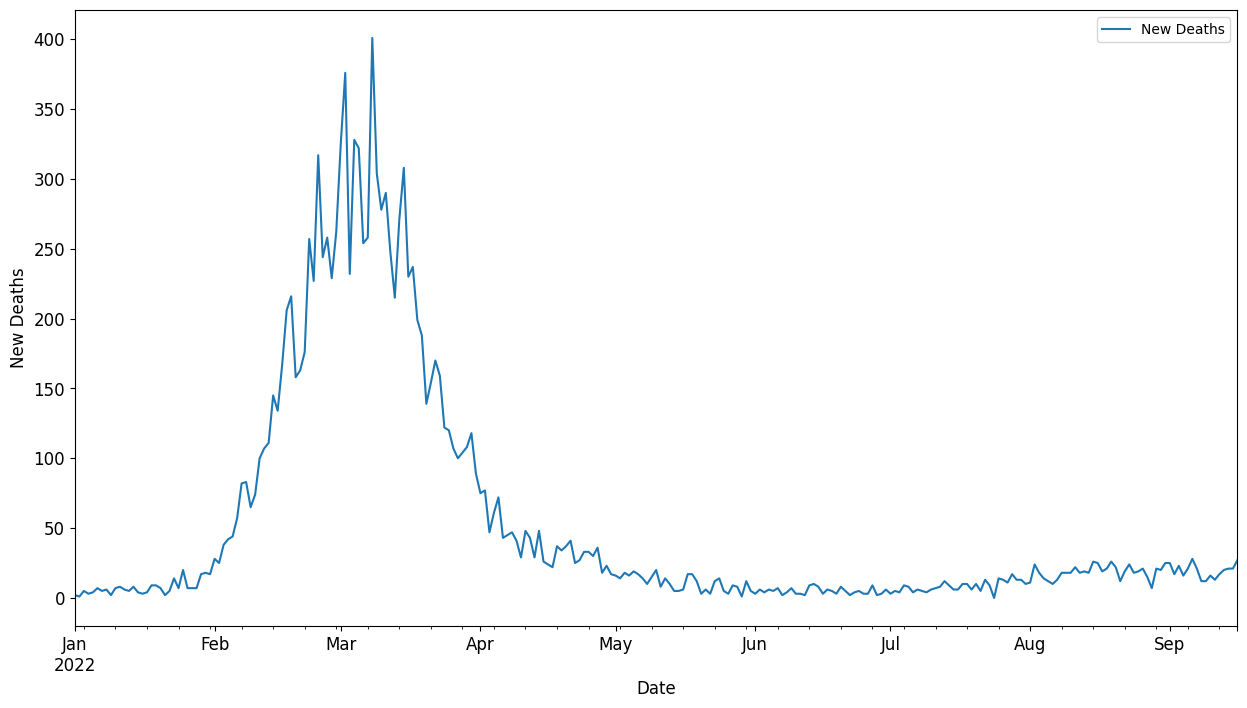

In [10]:
dd.plot(y='New Deaths', subplots=True, figsize=(15, 8), fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.ylabel('New Deaths', fontsize=12)
plt.show()

### Create training and testing datasets

In [11]:
# train_start_dt = dd['2022-01-01' : '2022-07-30']
# test_start_dt = dd['2022-08-01' : '2022-09-16']

train_start_dt = '2022-01-01'
test_start_dt = '2022-06-30'

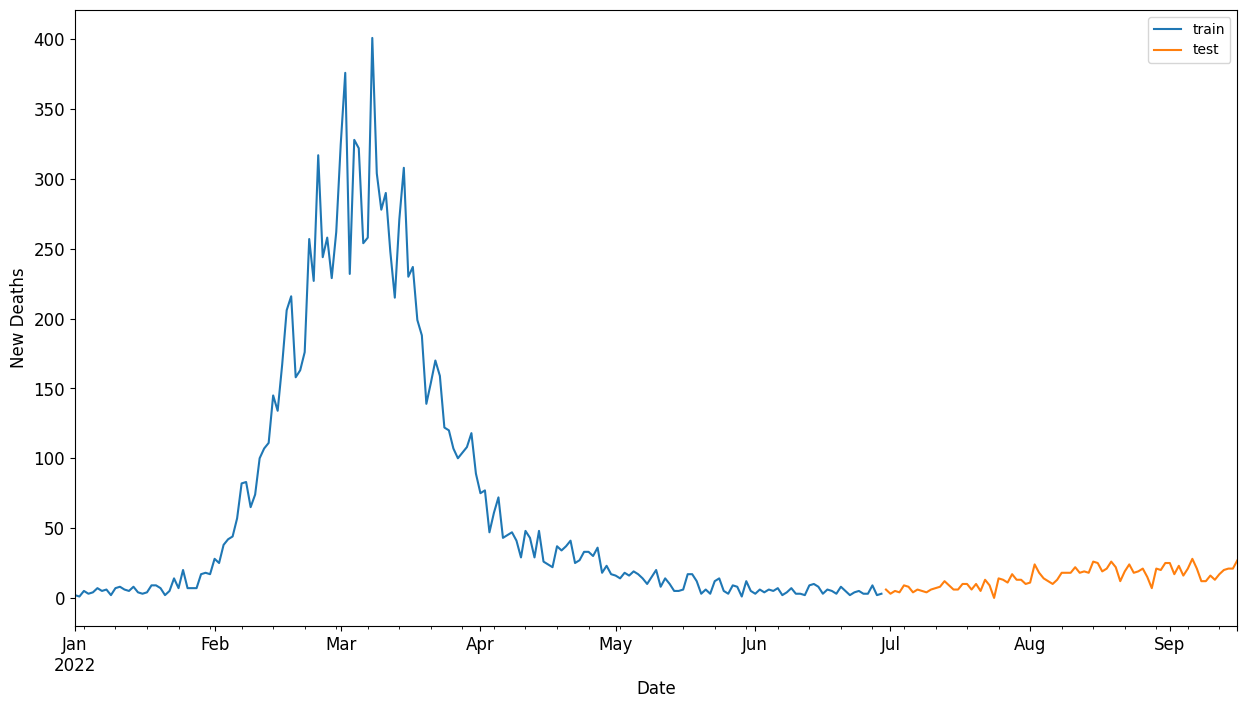

In [12]:
dd[(dd.index < test_start_dt) & (dd.index >= train_start_dt)][['New Deaths']].rename(columns={'New Deaths':'train'}) \
    .join(dd[test_start_dt:][['New Deaths']].rename(columns={'New Deaths':'test'}), how='outer') \
    .plot(y=['train', 'test'], figsize=(15, 8), fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.ylabel('New Deaths', fontsize=12)
plt.show()

In [13]:
train = dd.copy()[(dd.index >= train_start_dt) & (dd.index < test_start_dt)][['New Deaths']]
test = dd.copy()[dd.index >= test_start_dt][['New Deaths']]

print('Training data shape: ', train.shape)
print('Test data shape: ', test.shape)

Training data shape:  (180, 1)
Test data shape:  (79, 1)


In [14]:
scaler = MinMaxScaler()
train['New Deaths'] = scaler.fit_transform(train)
train.head(30)

,New Deaths
Date,
2022-01-01,0.0025
2022-01-02,0.0000
2022-01-03,0.0100
2022-01-04,0.0050
2022-01-05,0.0075
2022-01-06,0.0150
2022-01-07,0.0100
2022-01-08,0.0125
2022-01-09,0.0025


In [15]:
test['New Deaths'] = scaler.transform(test)
test.head(30)

,New Deaths
Date,
2022-06-30,0.0125
2022-07-01,0.0050
2022-07-02,0.0100
2022-07-03,0.0075
2022-07-04,0.0200
2022-07-05,0.0175
2022-07-06,0.0075
2022-07-07,0.0125
2022-07-08,0.0100


### Create data with time-steps

In [16]:
# Converting to numpy arrays

train_data = train.values
test_data = test.values

In [17]:
# Selecting the timesteps

timesteps=5

In [18]:
# Converting data to 2D tensor

train_data_timesteps=np.array([[j for j in train_data[i:i+timesteps]] for i in range(0,len(train_data)-timesteps+1)])[:,:,0]
train_data_timesteps.shape

(176, 5)

In [19]:
# Converting test data to 2D tensor

test_data_timesteps=np.array([[j for j in test_data[i:i+timesteps]] for i in range(0,len(test_data)-timesteps+1)])[:,:,0]
test_data_timesteps.shape

(75, 5)

In [20]:
x_train, y_train = train_data_timesteps[:,:timesteps-1],train_data_timesteps[:,[timesteps-1]]
x_test, y_test = test_data_timesteps[:,:timesteps-1],test_data_timesteps[:,[timesteps-1]]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(176, 4) (176, 1)
(75, 4) (75, 1)


### Creating SVR Model

In [21]:
# Create model using RBF kernel

model = SVR(kernel='rbf',gamma=0.5, C=10, epsilon = 0.05)

In [22]:
# Fit model on training data

model.fit(x_train, y_train[:,0])

SVR(C=10, epsilon=0.05, gamma=0.5)

In [23]:
# Making predictions

y_train_pred = model.predict(x_train).reshape(-1,1)
y_test_pred = model.predict(x_test).reshape(-1,1)

print(y_train_pred.shape, y_test_pred.shape)

(176, 1) (75, 1)


In [24]:
# Scaling the predictions

y_train_pred = scaler.inverse_transform(y_train_pred)
y_test_pred = scaler.inverse_transform(y_test_pred)

print(len(y_train_pred), len(y_test_pred))

176 75


In [25]:
# Scaling the original values

y_train = scaler.inverse_transform(y_train)
y_test = scaler.inverse_transform(y_test)

print(len(y_train), len(y_test))

176 75


In [26]:
# Extract the timesteps for x-axis

train_timestamps = dd[(dd.index < test_start_dt) & (dd.index >= train_start_dt)].index[timesteps-1:]
test_timestamps = dd[test_start_dt:].index[timesteps-1:]

print(len(train_timestamps), len(test_timestamps))

176 75


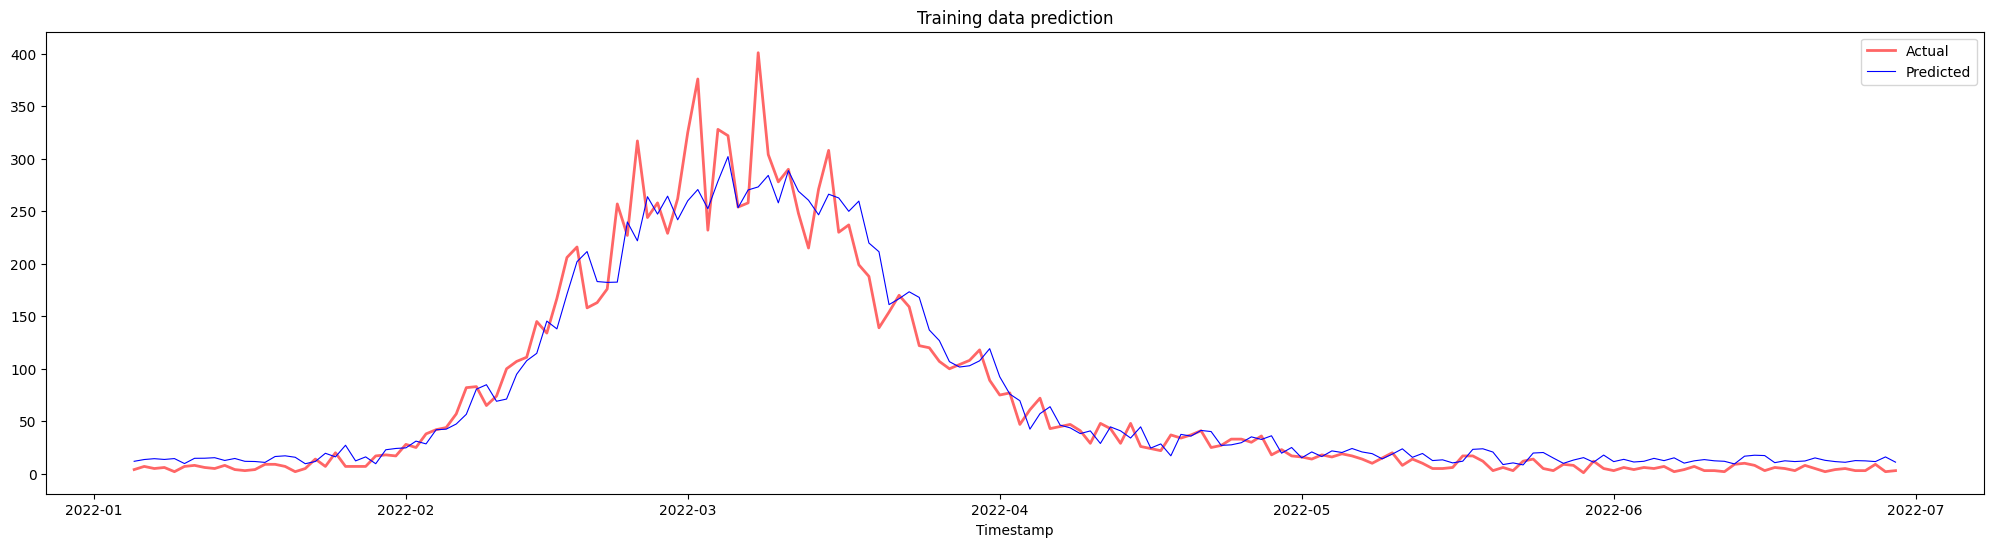

In [27]:
plt.figure(figsize=(25,6))
plt.plot(train_timestamps, y_train, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(train_timestamps, y_train_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Training data prediction")
plt.show()

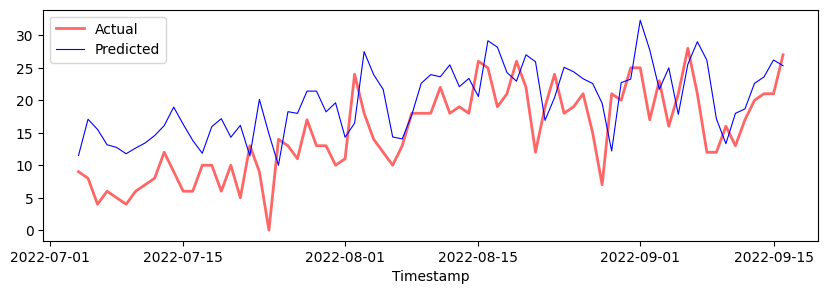

In [28]:
plt.figure(figsize=(10,3))
plt.plot(test_timestamps, y_test, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(test_timestamps, y_test_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.show()

In [29]:
# Extracting load values as numpy array
data = dd.copy().values

# Scaling
data = scaler.transform(data)

# Transforming to 2D tensor as per model input requirement
data_timesteps=np.array([[j for j in data[i:i+timesteps]] for i in range(0,len(data)-timesteps+1)])[:,:,0]
print("Tensor shape: ", data_timesteps.shape)

# Selecting inputs and outputs from data
X, Y = data_timesteps[:,:timesteps-1],data_timesteps[:,[timesteps-1]]
print("X shape: ", X.shape,"\nY shape: ", Y.shape)


Tensor shape:  (255, 5)
X shape:  (255, 4) 
Y shape:  (255, 1)


C:\Users\Klaudius Carol\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [30]:
# Make model predictions
Y_pred = model.predict(X).reshape(-1,1)

# Inverse scale and reshape
Y_pred = scaler.inverse_transform(Y_pred)
Y = scaler.inverse_transform(Y)

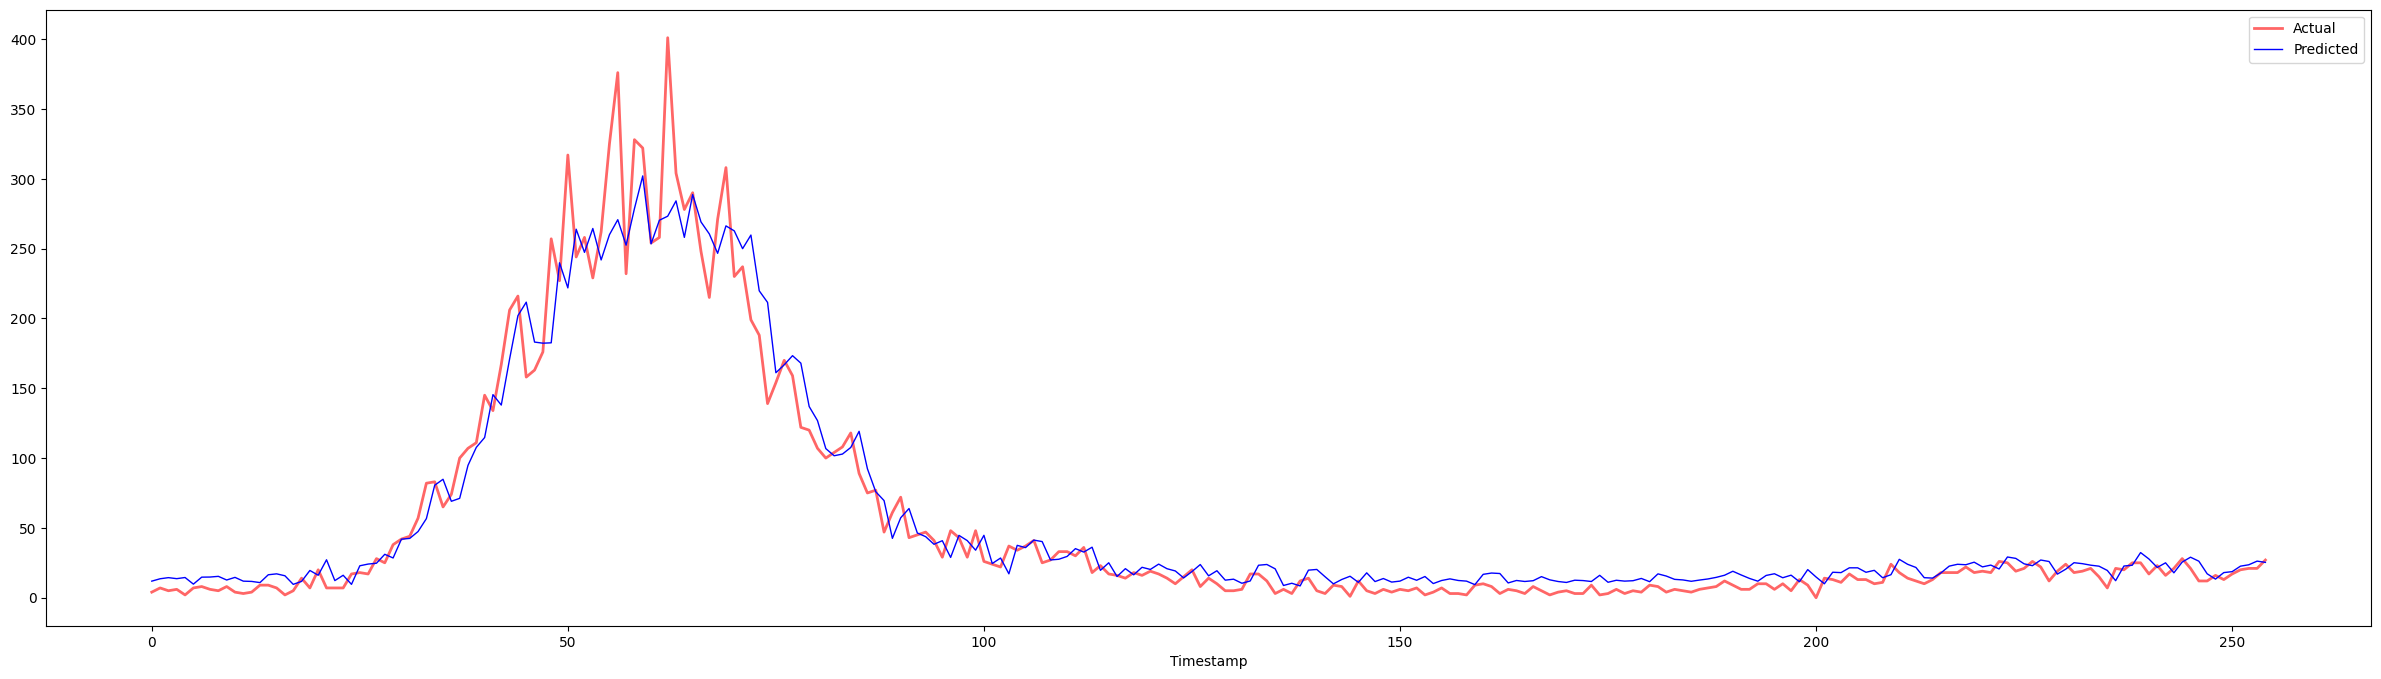

In [31]:
plt.figure(figsize=(30,8))
plt.plot(Y, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(Y_pred, color = 'blue', linewidth=1)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.show()

## Evaluate model for New Deaths

#### Print MAPE for testing data

In [32]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_train_pred, y_train)
print("MAPE for testing data: ",mape,"%")

MAPE for testing data:  0.3460794599128006 %


###### MAPE is a percentage error metric where the value corresponds to the average amount of error that predictions have. Therefore, a lower MAPE is better, where the lower the value the more accurate the model is

## Recovered

In [33]:
dd = mydata.drop(['New Cases', 'New Deaths', 'Total Cases', 'Total Deaths', 'Total Recovered'], axis=1)
dd

,New Recovered
Date,
2022-01-01,165
2022-01-02,190
2022-01-03,112
2022-01-04,168
2022-01-05,180
...,...
2022-09-12,3465
2022-09-13,3617
2022-09-14,3938


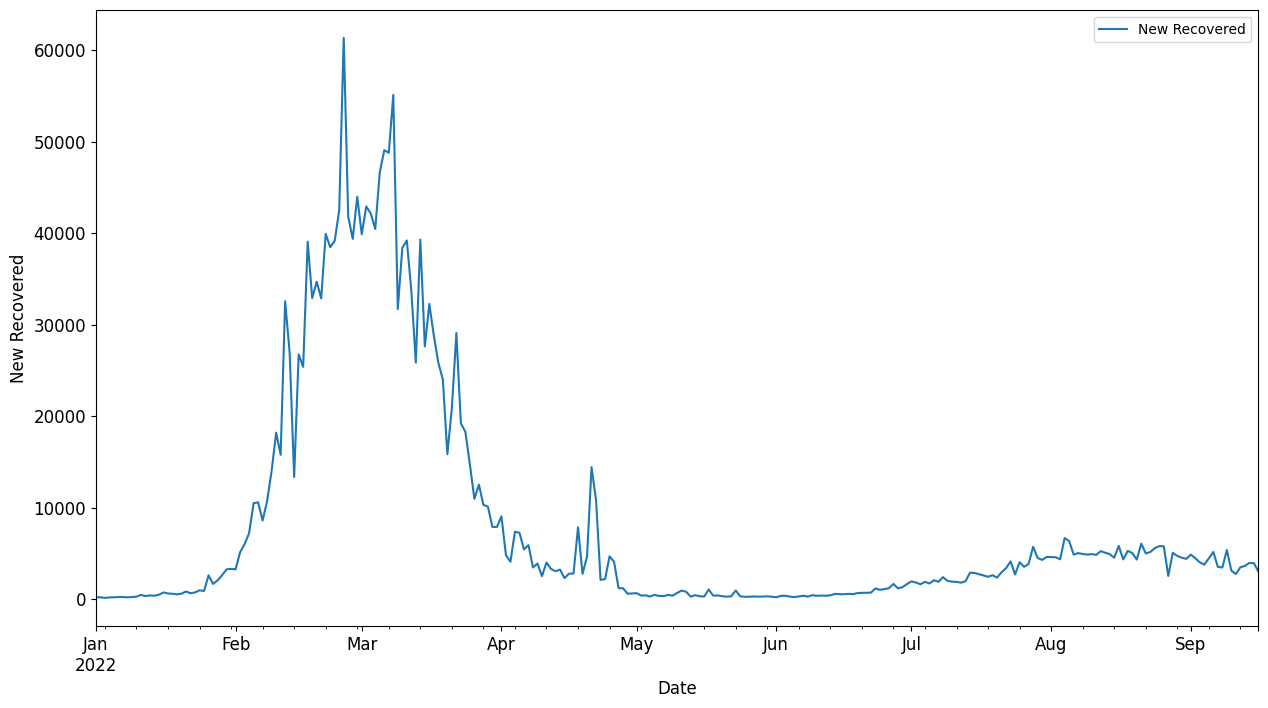

In [34]:
dd.plot(y='New Recovered', subplots=True, figsize=(15, 8), fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.ylabel('New Recovered', fontsize=12)
plt.show()

### Create training and testing datasets

In [35]:
train_start_dt = '2022-01-01'
test_start_dt = '2022-06-30'

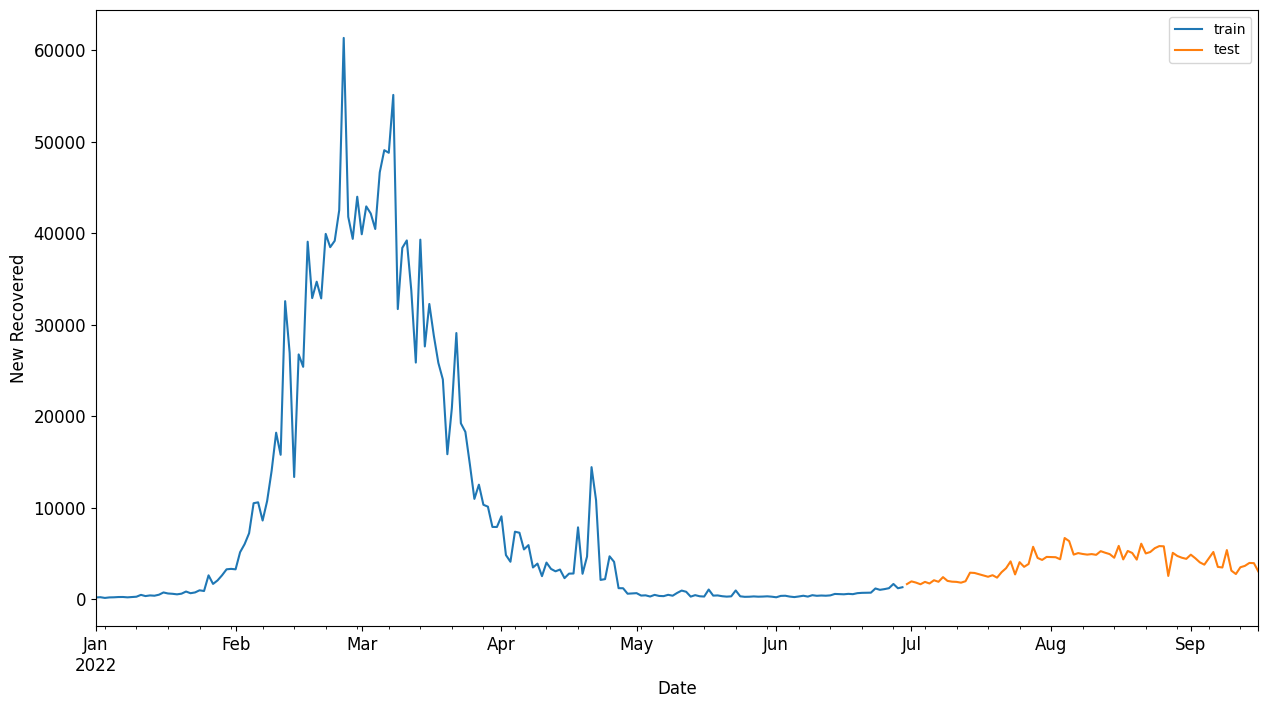

In [36]:
dd[(dd.index < test_start_dt) & (dd.index >= train_start_dt)][['New Recovered']].rename(columns={'New Recovered':'train'}) \
    .join(dd[test_start_dt:][['New Recovered']].rename(columns={'New Recovered':'test'}), how='outer') \
    .plot(y=['train', 'test'], figsize=(15, 8), fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.ylabel('New Recovered', fontsize=12)
plt.show()

In [37]:
train = dd.copy()[(dd.index >= train_start_dt) & (dd.index < test_start_dt)][['New Recovered']]
test = dd.copy()[dd.index >= test_start_dt][['New Recovered']]

print('Training data shape: ', train.shape)
print('Test data shape: ', test.shape)

Training data shape:  (180, 1)
Test data shape:  (79, 1)


In [38]:
scaler = MinMaxScaler()
train['New Recovered'] = scaler.fit_transform(train)
train.head(30)

,New Recovered
Date,
2022-01-01,0.000865
2022-01-02,0.001273
2022-01-03,0.000000
2022-01-04,0.000914
2022-01-05,0.001110
2022-01-06,0.001584
2022-01-07,0.001665
2022-01-08,0.001029
2022-01-09,0.001616


In [39]:
test['New Recovered'] = scaler.transform(test)
test.head(30)

,New Recovered
Date,
2022-06-30,0.024719
2022-07-01,0.029535
2022-07-02,0.027380
2022-07-03,0.024392
2022-07-04,0.028670
2022-07-05,0.025780
2022-07-06,0.031560
2022-07-07,0.028817
2022-07-08,0.037127


### Create data with time-steps

In [40]:
train_data = train.values
test_data = test.values

In [41]:
timesteps=5

In [42]:
train_data_timesteps=np.array([[j for j in train_data[i:i+timesteps]] for i in range(0,len(train_data)-timesteps+1)])[:,:,0]
train_data_timesteps.shape

(176, 5)

In [43]:
test_data_timesteps=np.array([[j for j in test_data[i:i+timesteps]] for i in range(0,len(test_data)-timesteps+1)])[:,:,0]
test_data_timesteps.shape

(75, 5)

In [44]:
x_train, y_train = train_data_timesteps[:,:timesteps-1],train_data_timesteps[:,[timesteps-1]]
x_test, y_test = test_data_timesteps[:,:timesteps-1],test_data_timesteps[:,[timesteps-1]]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(176, 4) (176, 1)
(75, 4) (75, 1)


### Creating SVR Model Recovered

In [45]:
model = SVR(kernel='rbf',gamma=0.5, C=10, epsilon = 0.05)
model.fit(x_train, y_train[:,0])

SVR(C=10, epsilon=0.05, gamma=0.5)

In [46]:
y_train_pred = model.predict(x_train).reshape(-1,1)
y_test_pred = model.predict(x_test).reshape(-1,1)

print(y_train_pred.shape, y_test_pred.shape)

(176, 1) (75, 1)


In [47]:
y_train_pred = scaler.inverse_transform(y_train_pred)
y_test_pred = scaler.inverse_transform(y_test_pred)
print("Predict:")
print(len(y_train_pred), len(y_test_pred))

Predict:
176 75


In [48]:
y_train = scaler.inverse_transform(y_train)
y_test = scaler.inverse_transform(y_test)
print("Original:")
print(len(y_train), len(y_test))

Original:
176 75


In [49]:
train_timestamps = dd[(dd.index < test_start_dt) & (dd.index >= train_start_dt)].index[timesteps-1:]
test_timestamps = dd[test_start_dt:].index[timesteps-1:]

print(len(train_timestamps), len(test_timestamps))

176 75


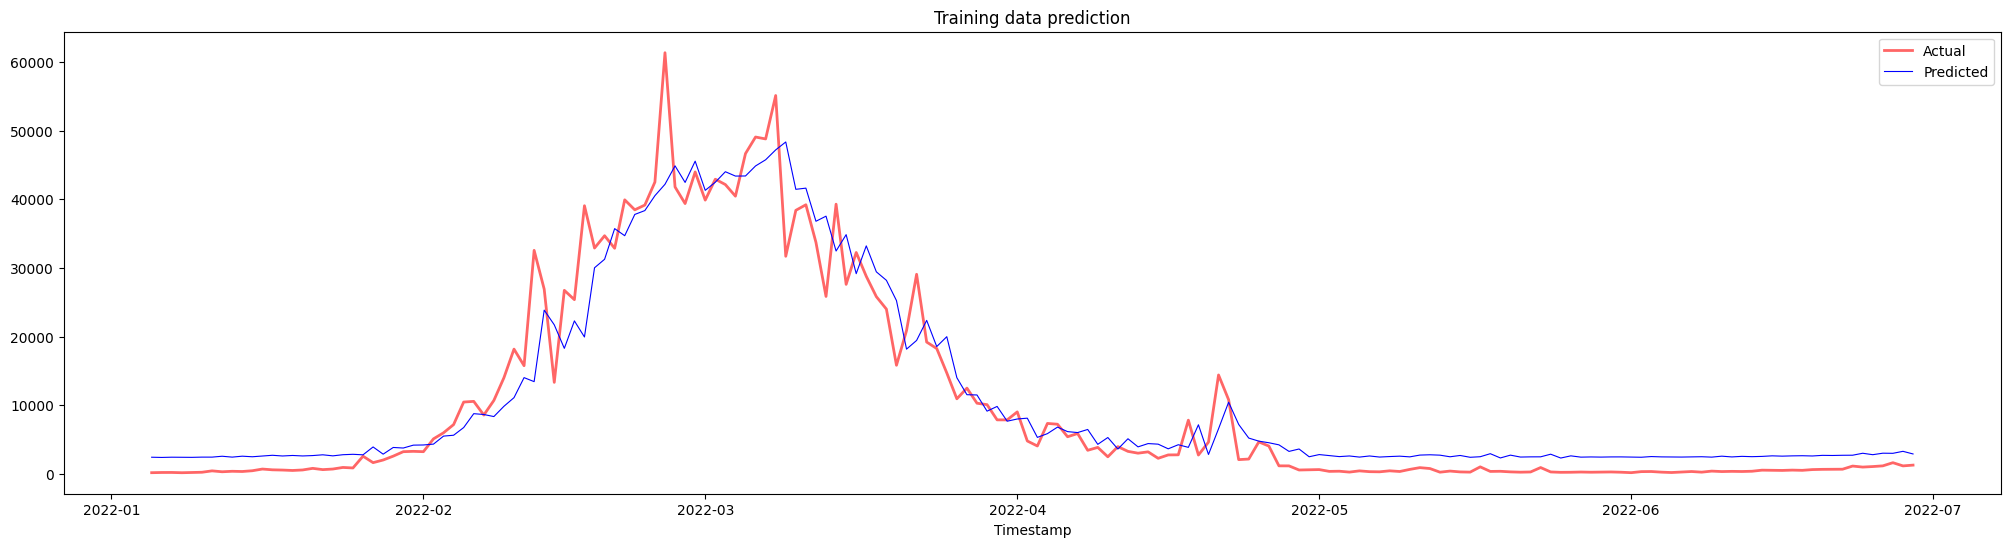

In [50]:
plt.figure(figsize=(25,6))
plt.plot(train_timestamps, y_train, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(train_timestamps, y_train_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Training data prediction")
plt.show()

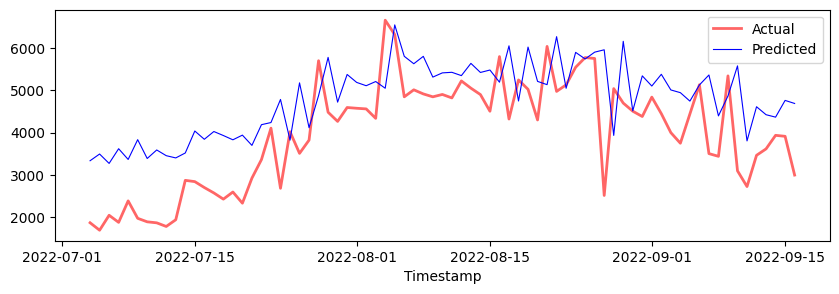

In [51]:
plt.figure(figsize=(10,3))
plt.plot(test_timestamps, y_test, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(test_timestamps, y_test_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.show()

In [52]:
# Extracting load values as numpy array
data = dd.copy().values

# Scaling
data = scaler.transform(data)

# Transforming to 2D tensor as per model input requirement
data_timesteps=np.array([[j for j in data[i:i+timesteps]] for i in range(0,len(data)-timesteps+1)])[:,:,0]
print("Tensor shape: ", data_timesteps.shape)

# Selecting inputs and outputs from data
X, Y = data_timesteps[:,:timesteps-1],data_timesteps[:,[timesteps-1]]
print("X shape: ", X.shape,"\nY shape: ", Y.shape)


Tensor shape:  (255, 5)
X shape:  (255, 4) 
Y shape:  (255, 1)


C:\Users\Klaudius Carol\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [53]:
# Make model predictions
Y_pred = model.predict(X).reshape(-1,1)

# Inverse scale and reshape
Y_pred = scaler.inverse_transform(Y_pred)
Y = scaler.inverse_transform(Y)

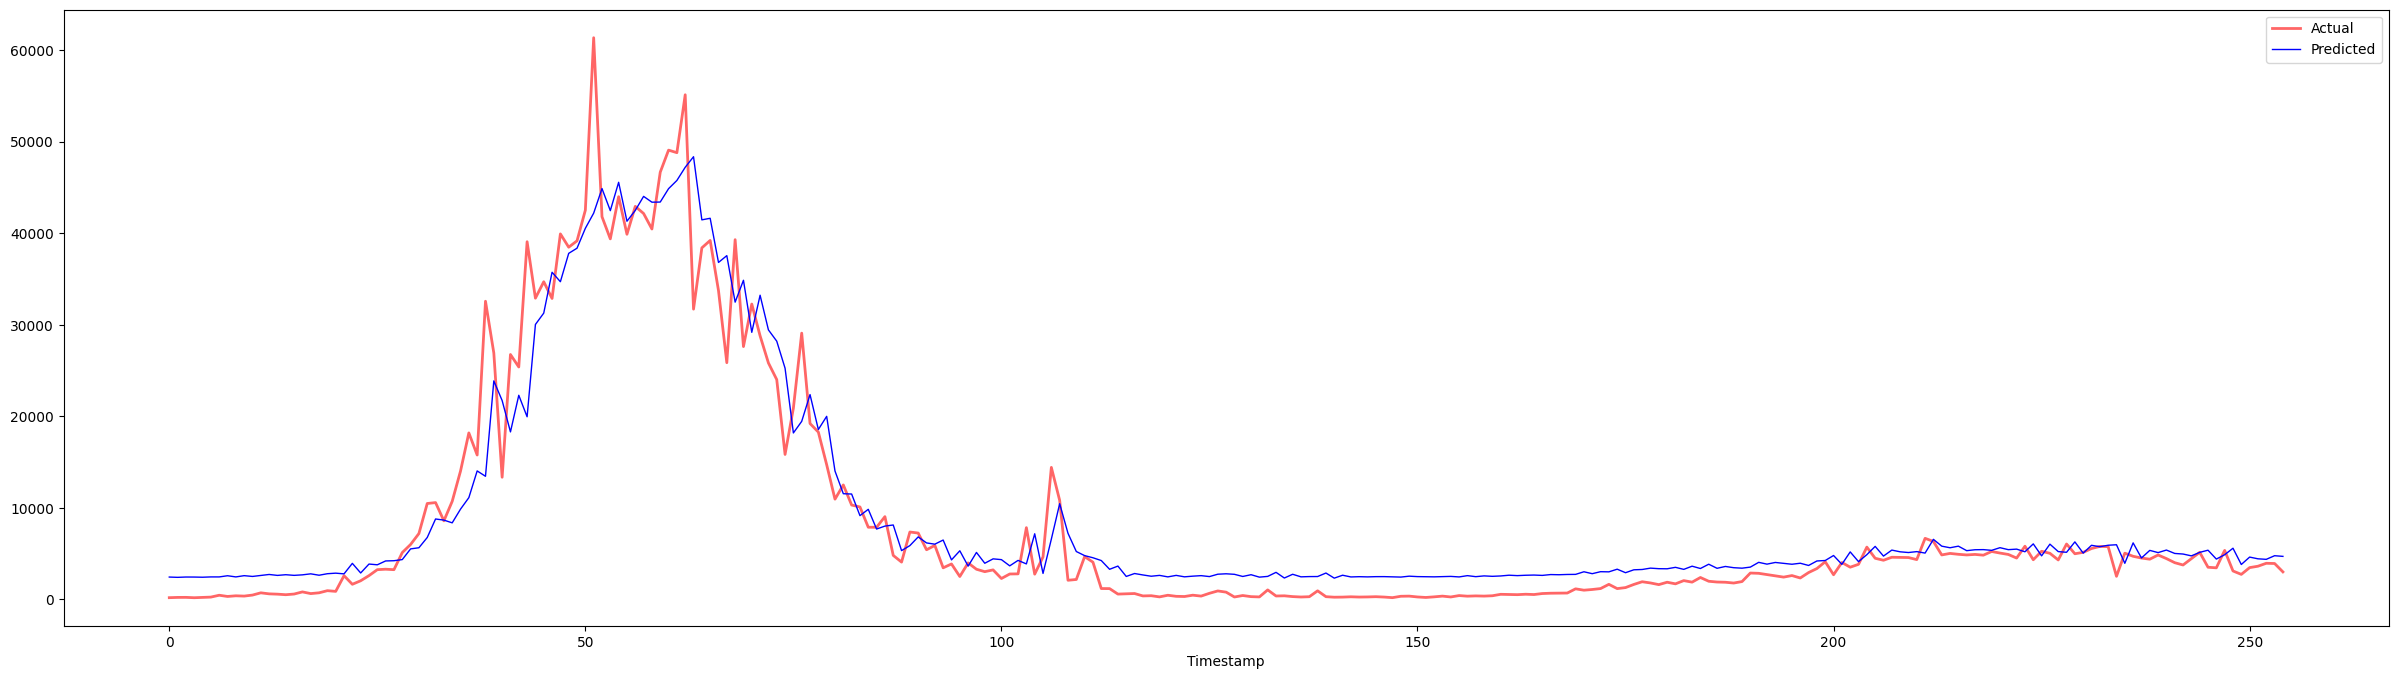

In [54]:
plt.figure(figsize=(30,8))
plt.plot(Y, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(Y_pred, color = 'blue', linewidth=1)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.show()

## Evaluate model for New Recovered

#### Print MAPE for testing data

In [55]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_train_pred, y_train)
print("MAPE for testing data: ",mape,"%")

MAPE for testing data:  0.5213447871357197 %


###### MAPE is a percentage error metric where the value corresponds to the average amount of error that predictions have. Therefore, a lower MAPE is better, where the lower the value the more accurate the model is

## New case

In [56]:
dd = mydata.drop(['New Recovered', 'New Deaths', 'Total Cases', 'Total Deaths', 'Total Recovered'], axis=1)
dd

,New Cases
Date,
2022-01-01,274
2022-01-02,174
2022-01-03,265
2022-01-04,299
2022-01-05,404
...,...
2022-09-12,1848
2022-09-13,2896
2022-09-14,2799


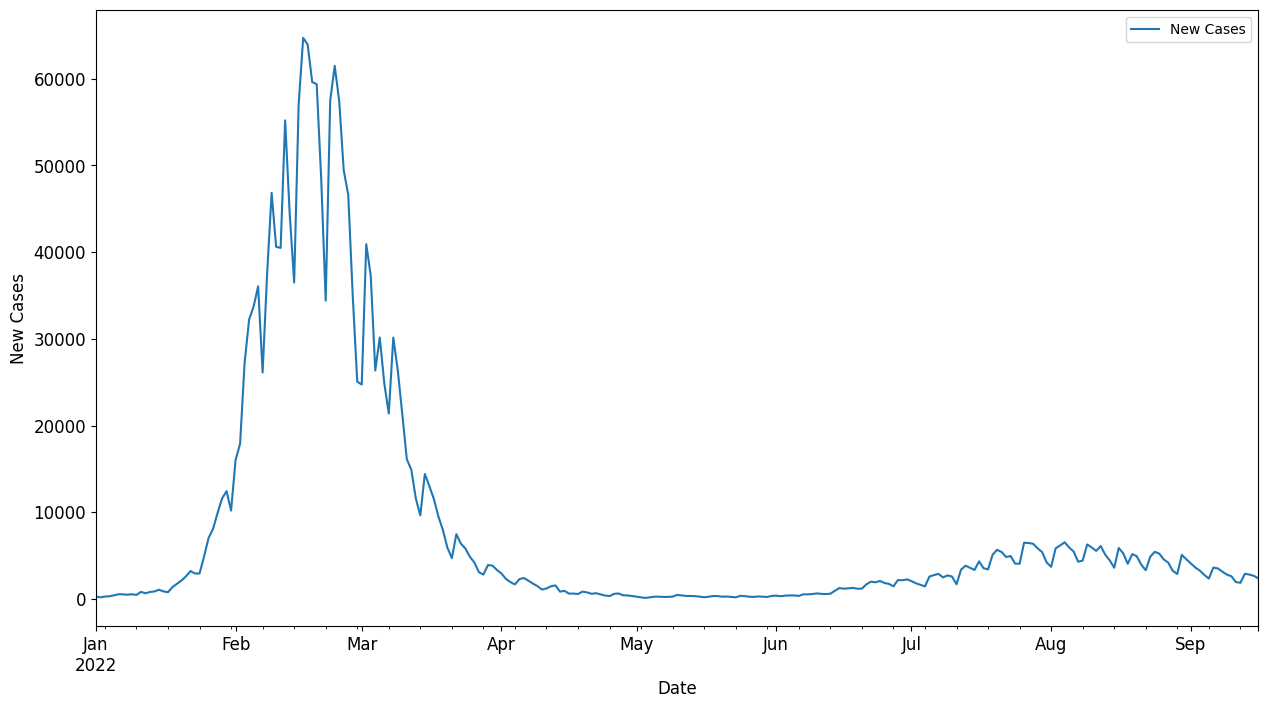

In [57]:
dd.plot(y='New Cases', subplots=True, figsize=(15, 8), fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.ylabel('New Cases', fontsize=12)
plt.show()

### Create training and testing datasets

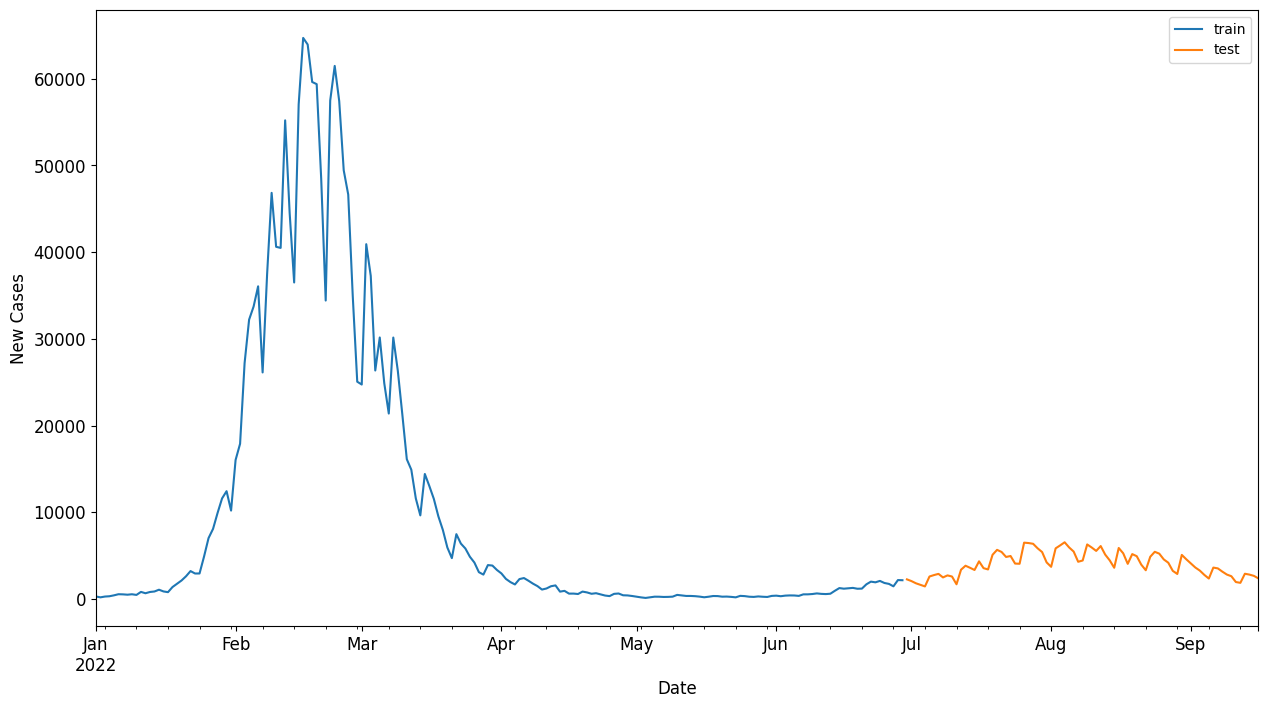

In [58]:
train_start_dt = '2022-01-01'
test_start_dt = '2022-06-30'
dd[(dd.index < test_start_dt) & (dd.index >= train_start_dt)][['New Cases']].rename(columns={'New Cases':'train'}) \
    .join(dd[test_start_dt:][['New Cases']].rename(columns={'New Cases':'test'}), how='outer') \
    .plot(y=['train', 'test'], figsize=(15, 8), fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.ylabel('New Cases', fontsize=12)
plt.show()

In [59]:
train = dd.copy()[(dd.index >= train_start_dt) & (dd.index < test_start_dt)][['New Cases']]
test = dd.copy()[dd.index >= test_start_dt][['New Cases']]

print('Training data shape: ', train.shape)
print('Test data shape: ', test.shape)

Training data shape:  (180, 1)
Test data shape:  (79, 1)


In [60]:
scaler = MinMaxScaler()
train['New Cases'] = scaler.fit_transform(train)
train.head(30)

,New Cases
Date,
2022-01-01,0.002585
2022-01-02,0.001037
2022-01-03,0.002445
2022-01-04,0.002972
2022-01-05,0.004597
2022-01-06,0.006593
2022-01-07,0.006361
2022-01-08,0.005758
2022-01-09,0.006531


In [61]:
test['New Cases'] = scaler.transform(test)
test.head(30)

,New Cases
Date,
2022-06-30,0.033137
2022-07-01,0.030057
2022-07-02,0.026110
2022-07-03,0.023324
2022-07-04,0.020538
2022-07-05,0.038229
2022-07-06,0.040798
2022-07-07,0.042934
2022-07-08,0.036604


### Create data with time-steps

In [62]:
train_data = train.values
test_data = test.values
timesteps=5

In [63]:
train_data_timesteps=np.array([[j for j in train_data[i:i+timesteps]] for i in range(0,len(train_data)-timesteps+1)])[:,:,0]
train_data_timesteps.shape

(176, 5)

In [64]:
test_data_timesteps=np.array([[j for j in test_data[i:i+timesteps]] for i in range(0,len(test_data)-timesteps+1)])[:,:,0]
test_data_timesteps.shape

(75, 5)

In [65]:
x_train, y_train = train_data_timesteps[:,:timesteps-1],train_data_timesteps[:,[timesteps-1]]
x_test, y_test = test_data_timesteps[:,:timesteps-1],test_data_timesteps[:,[timesteps-1]]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(176, 4) (176, 1)
(75, 4) (75, 1)


### Creating SVR Model Recovered

In [66]:
model = SVR(kernel='rbf',gamma=0.5, C=10, epsilon = 0.05)
model.fit(x_train, y_train[:,0])

SVR(C=10, epsilon=0.05, gamma=0.5)

In [67]:
y_train_pred = model.predict(x_train).reshape(-1,1)
y_test_pred = model.predict(x_test).reshape(-1,1)

print(y_train_pred.shape, y_test_pred.shape)

(176, 1) (75, 1)


In [68]:
y_train_pred = scaler.inverse_transform(y_train_pred)
y_test_pred = scaler.inverse_transform(y_test_pred)
print("Predict:")
print(len(y_train_pred), len(y_test_pred))

Predict:
176 75


In [69]:
y_train = scaler.inverse_transform(y_train)
y_test = scaler.inverse_transform(y_test)
print("Original:")
print(len(y_train), len(y_test))

Original:
176 75


In [70]:
train_timestamps = dd[(dd.index < test_start_dt) & (dd.index >= train_start_dt)].index[timesteps-1:]
test_timestamps = dd[test_start_dt:].index[timesteps-1:]

print(len(train_timestamps), len(test_timestamps))

176 75


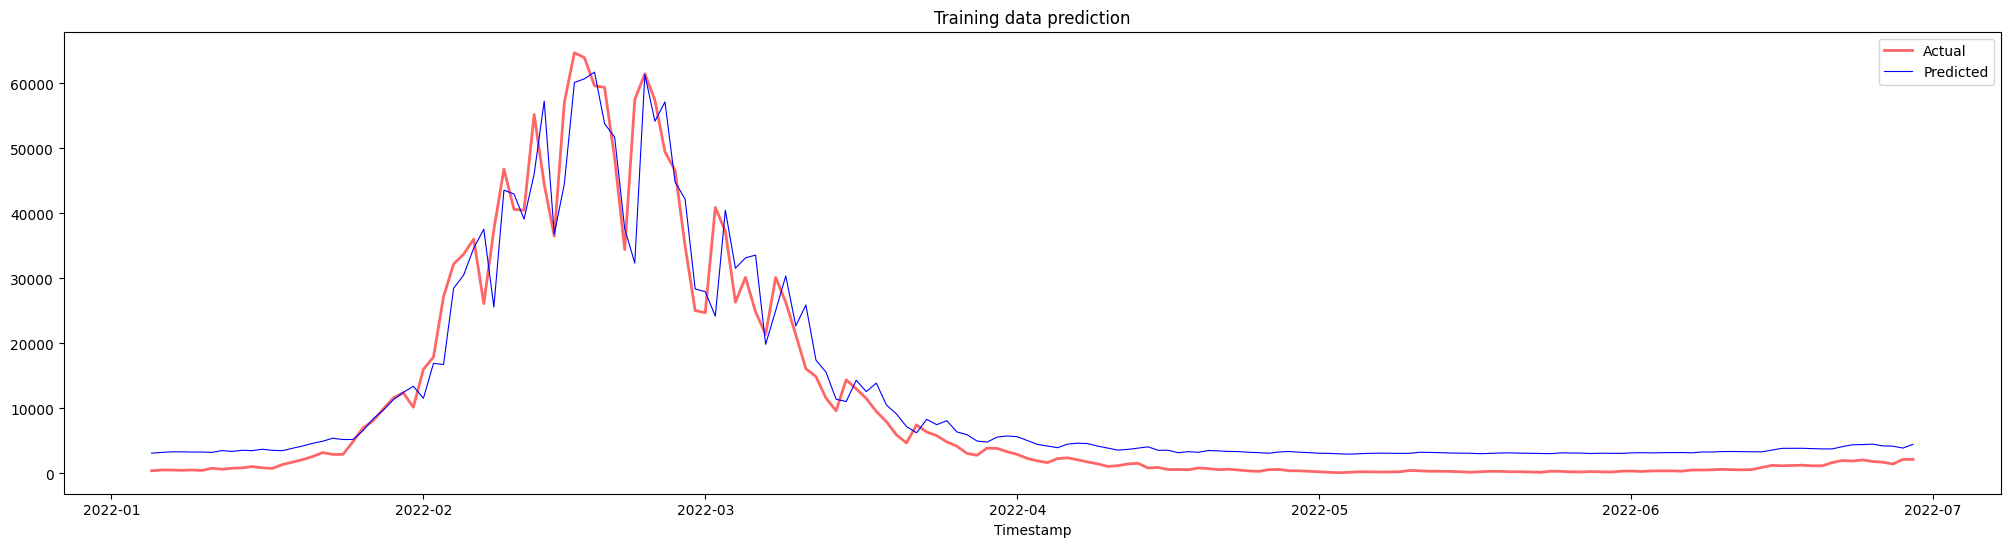

In [71]:
plt.figure(figsize=(25,6))
plt.plot(train_timestamps, y_train, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(train_timestamps, y_train_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Training data prediction")
plt.show()

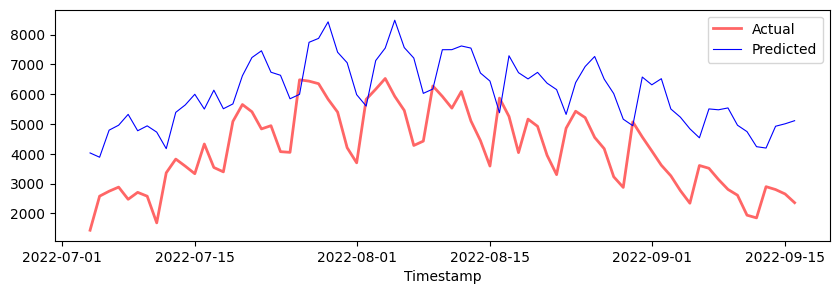

In [72]:
plt.figure(figsize=(10,3))
plt.plot(test_timestamps, y_test, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(test_timestamps, y_test_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.show()

In [73]:
# Extracting load values as numpy array
data = dd.copy().values

# Scaling
data = scaler.transform(data)

# Transforming to 2D tensor as per model input requirement
data_timesteps=np.array([[j for j in data[i:i+timesteps]] for i in range(0,len(data)-timesteps+1)])[:,:,0]
print("Tensor shape: ", data_timesteps.shape)

# Selecting inputs and outputs from data
X, Y = data_timesteps[:,:timesteps-1],data_timesteps[:,[timesteps-1]]
print("X shape: ", X.shape,"\nY shape: ", Y.shape)


Tensor shape:  (255, 5)
X shape:  (255, 4) 
Y shape:  (255, 1)


C:\Users\Klaudius Carol\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


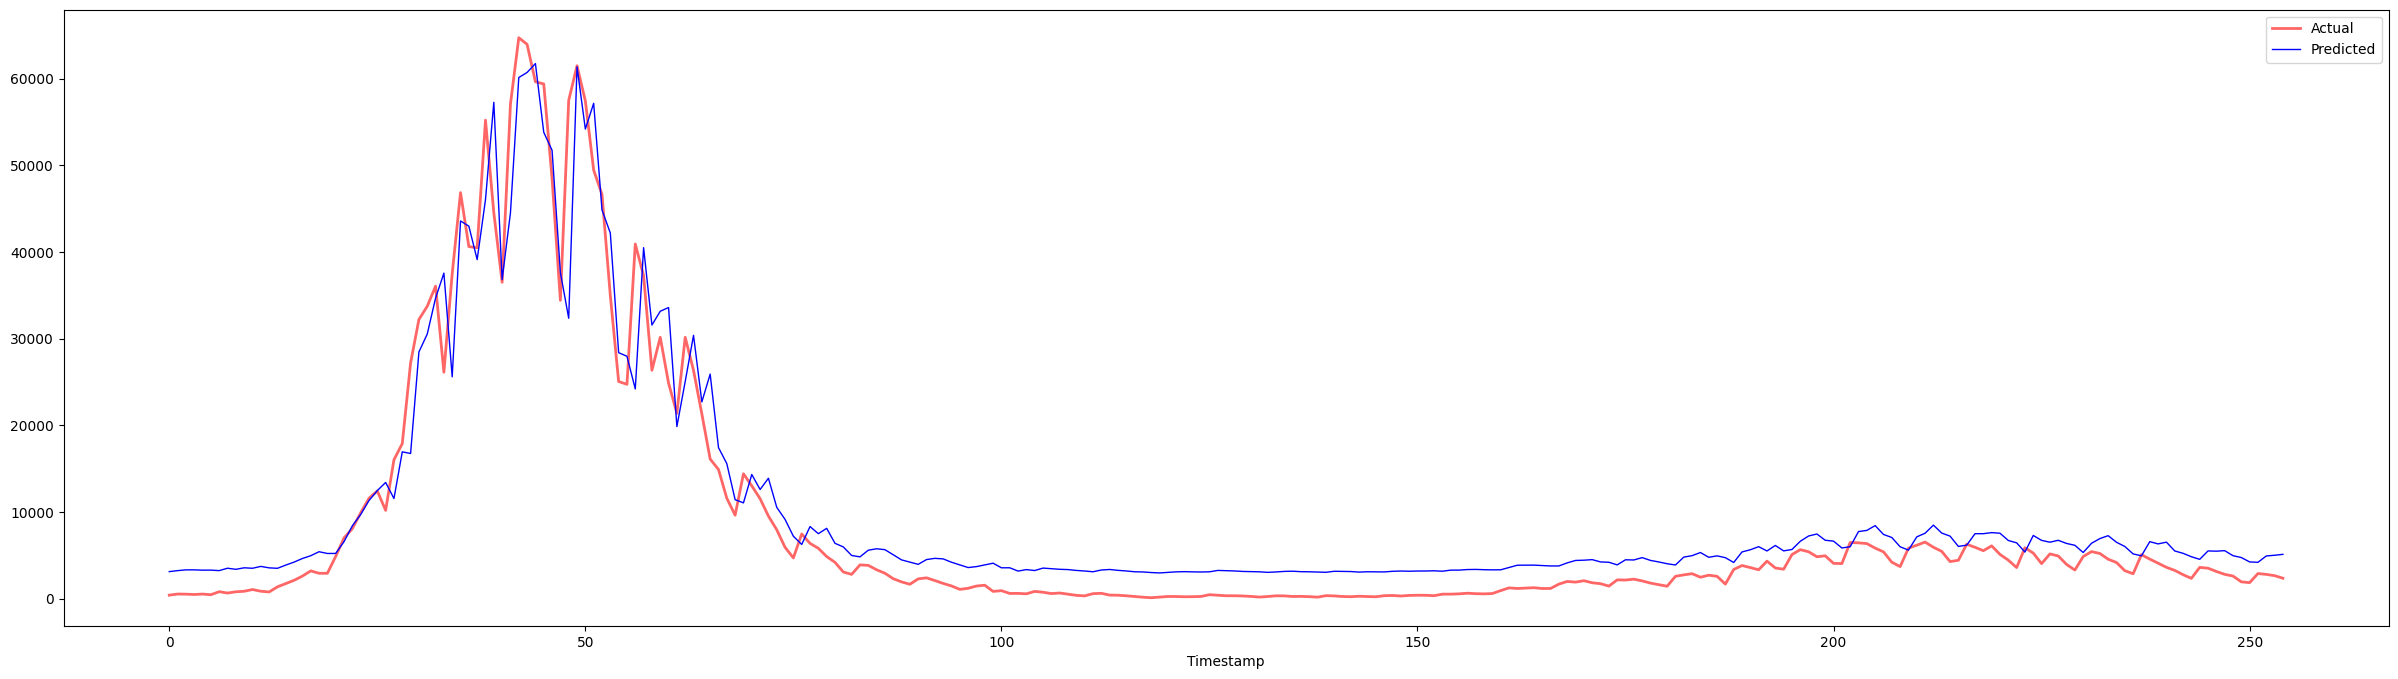

In [74]:
# Make model predictions
Y_pred = model.predict(X).reshape(-1,1)

# Inverse scale and reshape
Y_pred = scaler.inverse_transform(Y_pred)
Y = scaler.inverse_transform(Y)
plt.figure(figsize=(30,8))
plt.plot(Y, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(Y_pred, color = 'blue', linewidth=1)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.show()

## Evaluate model for New case

#### Print MAPE for testing data

In [75]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_train_pred, y_train)
print("MAPE for testing data: ",mape,"%")

MAPE for testing data:  0.5548555945945313 %


###### MAPE is a percentage error metric where the value corresponds to the average amount of error that predictions have. Therefore, a lower MAPE is better, where the lower the value the more accurate the model is

In [1]:
!jupyter nbconvert --to html "./NIM_Nama_FileKerja_IF540L.ipynb" --output-dir="./"

[NbConvertApp] Converting notebook ./NIM_Nama_FileKerja_IF540L.ipynb to html
[NbConvertApp] Writing 2114449 bytes to NIM_Nama_FileKerja_IF540L.html


### Kesimpulan



Berikan simpulan yang dilakukan dari hasil kerja menggunakan algoritma dan 2 dataset yang
dipilih. Simpulan bisa berkisar antara (bisa di modifikasi):

    - Simpulan perbandingan dataset
    - Hasil akurasi yang diberikan (jika ada dalam modul)
    - Hasil perbandingan akurasi antara algoritma (jika ada dalam modul)
    - Hasil pemikiran dan observasi akhir dari kerja menurut mahasiswa.

***

### Save the notebook, then convert the notebook to html (by running the next code).

### Next step:
* convert the generated html file to PDF using the online tool: https://www.sejda.com/html-to-pdf
* choose the following settings:
    * Page size: One long page
    * Page Orientation: auto
    * Use print stylesheet
* Submit your ipython notebook and PDF files

Markdown basics https://markdown-guide.readthedocs.io/en/latest/basics.html#